## Introducción al Análisis Exploratorio de Datos (EDA)

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sqlite3
import plotly.graph_objects as go
from seaborn import boxplot
from seaborn import violinplot
from matplotlib.ticker import FormatStrFormatter
from plotly.subplots import make_subplots
%matplotlib inline
sns.set(rc = {'figure.figsize':(9,5)})
#Leemos el csv y lo cargamos a un DataFrame. Utilizamos columna PID como index.
df = pd.read_csv('Data/Ames_Housing_Data.csv', index_col="PID")
#Utilizamos esta función para que nos muestre todas las columnas. Sino solo muestra un porcentaje de ellas.
pd.options.display.max_columns = None
#Realizamos visualización de una muestra aleatoria de 10 datos.
df.sample(10)

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
PID                                                                     
535403210           20        RL          90.0     10454   Pave   NaN   
914452090           85        RL           NaN     12150   Pave   NaN   
527252050          120        RL          61.0      8035   Pave   NaN   
535402140           80        RL          93.0     10090   Pave   NaN   
916380070           20        RL          89.0     12898   Pave   NaN   
526354020           20        RL          90.0     11727   Pave   NaN   
534453150           50        RL          92.0      7438   Pave   NaN   
528228465           20        RL          43.0      3182   Pave   NaN   
527302060           60        RL          78.0     12090   Pave   NaN   
923225390          120        RM          31.0      2394   Pave   NaN   

          Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
PID                                                                             
535403210       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
914452090       IR1          Bnk    AllPub    CulDSac        Gtl      Mitchel   
527252050       IR1          HLS    AllPub     Inside        Gtl      StoneBr   
535402140       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
916380070       IR1          HLS    AllPub     Inside        Gtl       Timber   
526354020       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
534453150       IR1          Lvl    AllPub     Inside        Gtl      BrkSide   
528228465       Reg          Lvl    AllPub     Inside        Gtl      Blmngtn   
527302060       Reg          Lvl    AllPub     Inside        Gtl       NWAmes   
923225390       Reg          Low    AllPub     Inside        Mod      MeadowV   

          Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
PID                                                                     
535403210        Norm        Norm      1Fam      1Story             6   
914452090        Norm        Norm      1Fam      SFoyer             6   
527252050        Norm        Norm    TwnhsE      1Story             9   
535402140        Norm        Norm      1Fam        SLvl             7   
916380070        Norm        Norm      1Fam      1Story             9   
526354020        Norm        Norm      1Fam      1Story             7   
534453150        RRAn       Feedr      1Fam      1.5Fin             5   
528228465        Norm        Norm      1Fam      1Story             7   
527302060        Norm        Norm      1Fam      2Story             7   
923225390        Norm        Norm     Twnhs      1Story             5   

           Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
PID                                                                        
535403210             6        1957            1957        Hip   CompShg   
914452090             6        1979            1979      Gable   CompShg   
527252050             5        2006            2006      Gable   CompShg   
535402140             5        1963            1999      Gable   CompShg   
916380070             5        2007            2008        Hip   CompShg   
526354020             6        1969            1969      Gable   CompShg   
534453150             8        1908            1991      Gable   CompShg   
528228465             5        2007            2007      Gable   CompShg   
527302060             7        1981            2003      Gable   CompShg   
923225390             6        1973            1973      Gable   CompShg   

          Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
PID                                                                         
535403210      Plywood      Plywood        Stone         143.0         TA   
914452090      HdBoard      Wd Shng         None           0.0         TA   
527252050      MetalSd      MetalSd      BrkFace         165.0 

In [2]:
#Introduccion a EDA
#Describe general donde podemos analizar medidas de tendencia central.
#FUNCIONA SOLO PARA LOS VALORES NUMERICOS!!!
pd.options.display.max_columns = None
df.describe().T

count           mean           std      min        25%  \
MS SubClass      2930.0      57.387372     42.638025     20.0      20.00   
Lot Frontage     2440.0      69.224590     23.365335     21.0      58.00   
Lot Area         2930.0   10147.921843   7880.017759   1300.0    7440.25   
Overall Qual     2930.0       6.094881      1.411026      1.0       5.00   
Overall Cond     2930.0       5.563140      1.111537      1.0       5.00   
Year Built       2930.0    1971.356314     30.245361   1872.0    1954.00   
Year Remod/Add   2930.0    1984.266553     20.860286   1950.0    1965.00   
Mas Vnr Area     2907.0     101.896801    179.112611      0.0       0.00   
BsmtFin SF 1     2929.0     442.629566    455.590839      0.0       0.00   
BsmtFin SF 2     2929.0      49.722431    169.168476      0.0       0.00   
Bsmt Unf SF      2929.0     559.262547    439.494153      0.0     219.00   
Total Bsmt SF    2929.0    1051.614544    440.615067      0.0     793.00   
1st Flr SF       2930.0    1159.557679    391.890885    334.0     876.25   
2nd Flr SF       2930.0     335.455973    428.395715      0.0       0.00   
Low Qual Fin SF  2930.0       4.676792     46.310510      0.0       0.00   
Gr Liv Area      2930.0    1499.690444    505.508887    334.0    1126.00   
Bsmt Full Bath   2928.0       0.431352      0.524820      0.0       0.00   
Bsmt Half Bath   2928.0       0.061134      0.245254      0.0       0.00   
Full Bath        2930.0       1.566553      0.552941      0.0       1.00   
Half Bath        2930.0       0.379522      0.502629      0.0       0.00   
Bedroom AbvGr    2930.0       2.854266      0.827731      0.0       2.00   
Kitchen AbvGr    2930.0       1.044369      0.214076      0.0       1.00   
TotRms AbvGrd    2930.0       6.443003      1.572964      2.0       5.00   
Fireplaces       2930.0       0.599317      0.647921      0.0       0.00   
Garage Yr Blt    2771.0    1978.132443     25.528411   1895.0    1960.00   
Garage Cars      2929.0       1.766815      0.760566      0.0       1.00   
Garage Area      2929.0     472.819734    215.046549      0.0     320.00   
Wood Deck SF     2930.0      93.751877    126.361562      0.0       0.00   
Open Porch SF    2930.0      47.533447     67.483400      0.0       0.00   
Enclosed Porch   2930.0      23.011604     64.139059      0.0       0.00   
3Ssn Porch       2930.0       2.592491     25.141331      0.0       0.00   
Screen Porch     2930.0      16.002048     56.087370      0.0       0.00   
Pool Area        2930.0       2.243345     35.597181      0.0       0.00   
Misc Val         2930.0      50.635154    566.344288      0.0       0.00   
Mo Sold          2930.0       6.216041      2.714492      1.0       4.00   
Yr Sold          2930.0    2007.790444      1.316613   2006.0    2007.00   
SalePrice        2930.0  180796.060068  79886.692357  12789.0  129500.00   

                      50%        75%       max  
MS SubClass          50.0      70.00     190.0  
Lot Frontage         68.0      80.00     313.0  
Lot Area           9436.5   11555.25  215245.0  
Overall Qual          6.0       7.00      10.0  
Overall Cond          5.0       6.00       9.0  
Year Built         1973.0    2001.00    2010.0  
Year Remod/Add     1993.0    2004.00    2010.0  
Mas Vnr Area          0.0     164.00    1600.0  
BsmtFin SF 1        370.0     734.00    5644.0  
BsmtFin SF 2          0.0       0.00    1526.0  
Bsmt Unf SF         466.0     802.00    2336.0  
Total Bsmt SF       990.0    1302.00    6110.0  
1st Flr SF         1084.0    1384.00    5095.0  
2nd Flr SF            0.0     703.75    2065.0  
Low Qual Fin SF       0.0       0.00    1064.0  
Gr Liv Area        1442.0    1742.75    5642.0  
Bsmt Full Bath        0.0       1.00       3.0  
Bsmt Half Bath        0.0       0.00       2.0  
Full Bath             2.0       2.00       4.0  
Half Bath             0.0       1.00       2.0  
Bedroom AbvGr         3.0       3.00       8.0  
Kitchen AbvGr         1.0       1.00       3.0  
To

#### Matriz de correlación

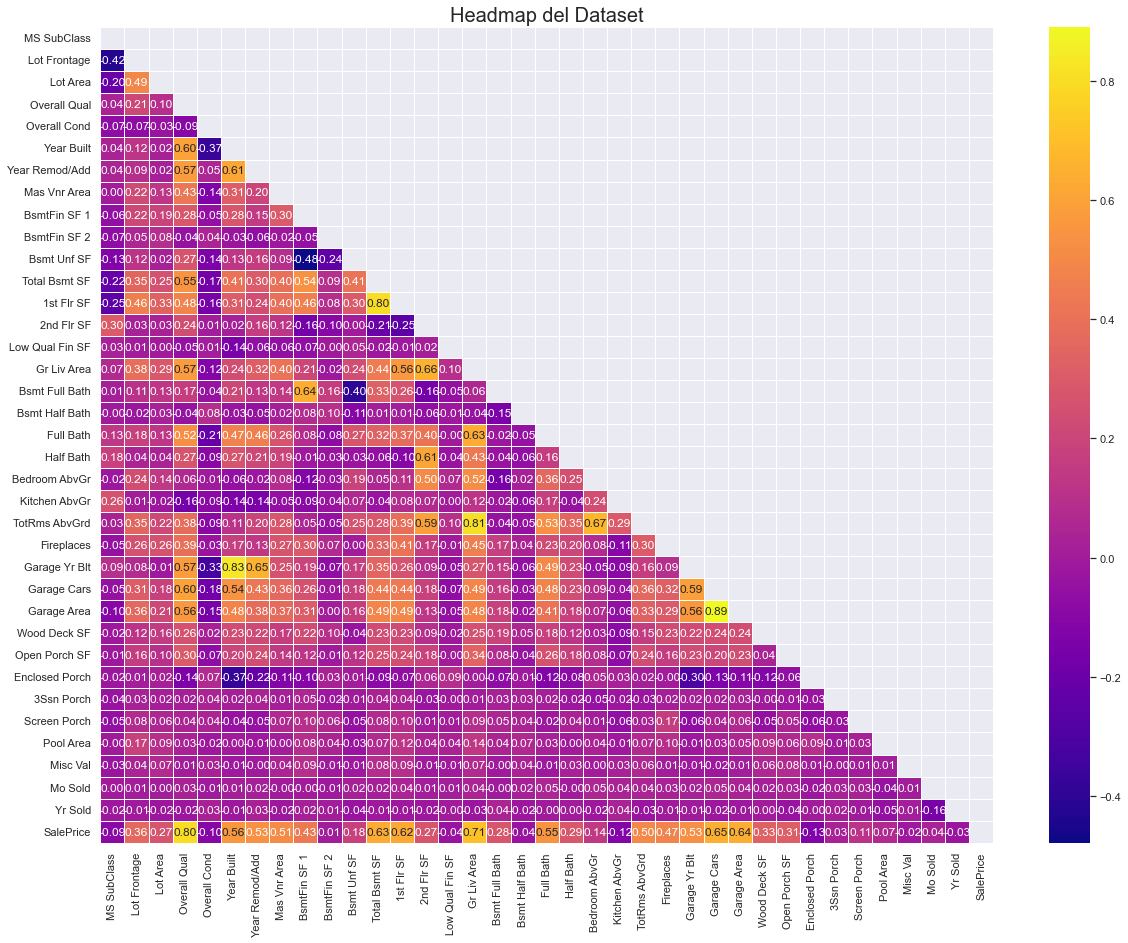

In [3]:
plt.rcParams['figure.figsize'] = (20,15)
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.title('Headmap del Dataset', fontsize = 20)
plt.show()

### Conclusiones Exploracion y analisis de datos:
para el analisis general las correclaciones optimas son:

-Overall Qual & SalePrice

-Garage Yr Built & Year Built

-1st Flr SF & Total BsmntSF1 

-TotRms AbvGr & Gr LivArea

-Garage Cars & Garage Area
## Análisis Univariado

In [6]:
#Cambio de tipo de dato
df = df.astype({'MS SubClass':object})
fig = make_subplots(rows=6, cols=6)

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf =  df.select_dtypes('number')


fila=[1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6]
columna=[1,2,3,4,5,6]*6
for column in newdf:
    fig.append_trace(go.Histogram(x=newdf[f'{column}'], name=f"{column}"), fila[0], columna[0])
    fila.pop(0)
    columna.pop(0)

fig.show()

#### Precio de Venta

In [7]:
#Medidas de tendencia central para la variable Precio de Venta.
df.SalePrice.describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

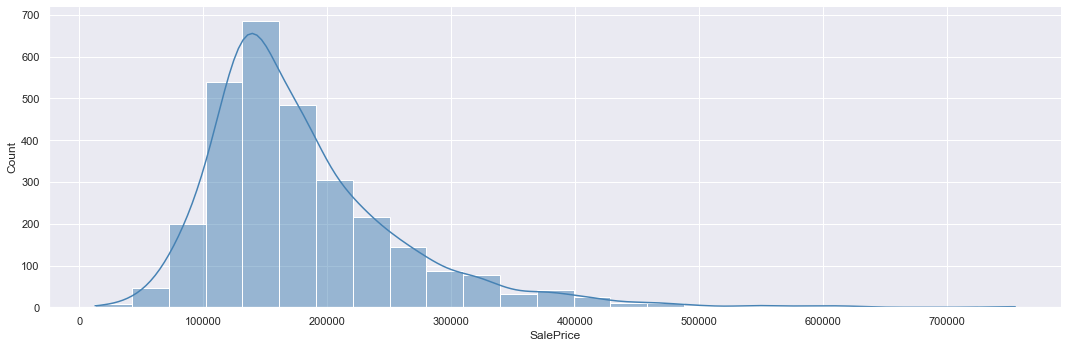

In [8]:
#Distribución de la variable PRECIO DE VENTA
sns.displot(df['SalePrice'], bins=25, color="steelblue", kde=True, aspect=3)
plt.show()

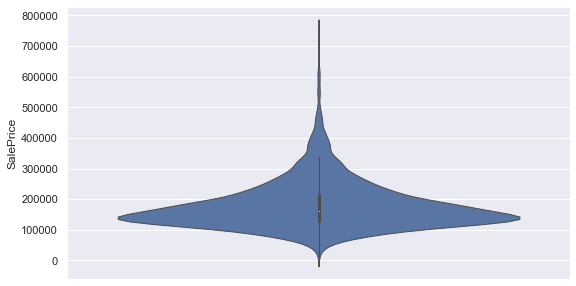

In [9]:
plt.figure(figsize=(9,5))
violinplot(y = df.SalePrice, data=df , orient="v",linewidth=1)
plt.show()

#### Área de garage

C:\Users\Nardulli\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



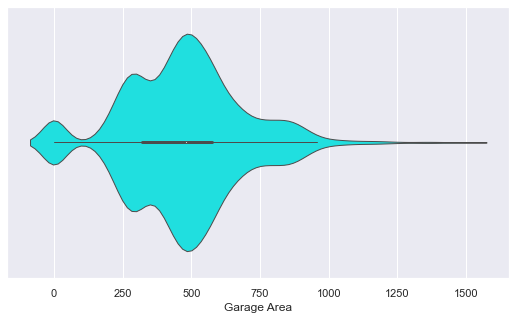

In [10]:
plt.figure(figsize=(9,5))
violinplot(df['Garage Area'],linewidth=1, color="cyan")
plt.show()

#### Área habitable

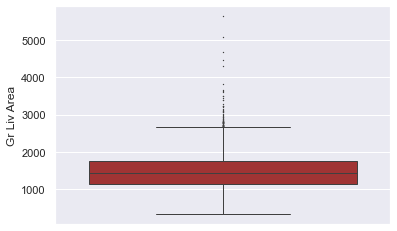

In [11]:
plt.figure(figsize=(6,4))
boxplot(y=df['Gr Liv Area'], color="firebrick", linewidth=1, fliersize=0.5)
plt.show()

#### Mes de venta

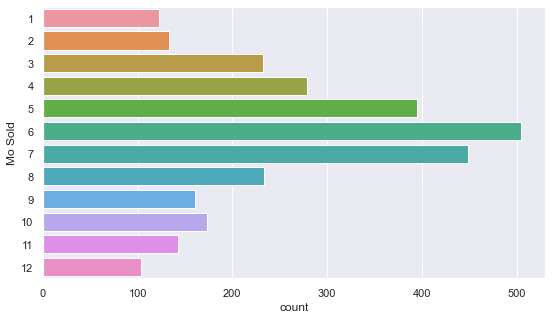

In [13]:
plt.figure(figsize=(9,5))
sns.countplot(y=df['Mo Sold'])
plt.show()

#### Año de construcción

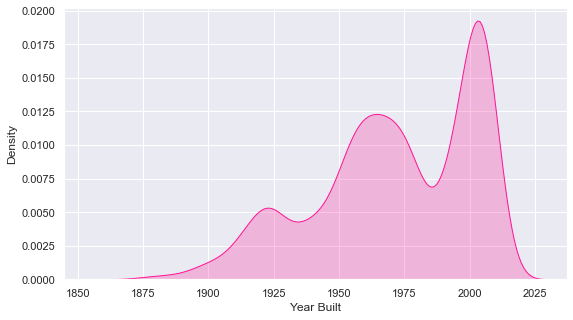

In [14]:
plt.figure(figsize=(9,5))
sns.kdeplot(x=df['Year Built'], color="deeppink", shade=True)
plt.show()

## Analisis Univariado Conclusiones:
- El frente de lote se encuentra mayormente entre los valores 50 a 80 metros de longitud.
- En su mayoría son viviendas consideradas con calidad y condiciones en un nivel medio.
- Sólo hay algunas pocas casas con dos cocinas, más del 90% de las casas vendidas poseen una sola cocina.
- Las casas que tienen capacidad para dos autos en su garage supera el doble de las viviendas que poseen sólo uno.
- La cantidad de habitaciones en la totalidad de las casas es mayormente de 6.
- Las casas que poseen 3 habitaciones son mayor en cantidad a las viviendas que poseen 2 y 4 habitaciones juntas.
- La mayoría de las transacciones de venta se concretaron a mitad de año, en los meses de mayo, junio y julio.

### Precio de venta
-los precios generales de las propiedades examinadas rondan entre los 120000$ y los 755000$ con la mayor parte de las propiedades ubicandose en el rango de los 213500$

## Análisis Bivariado
#### Análisis general

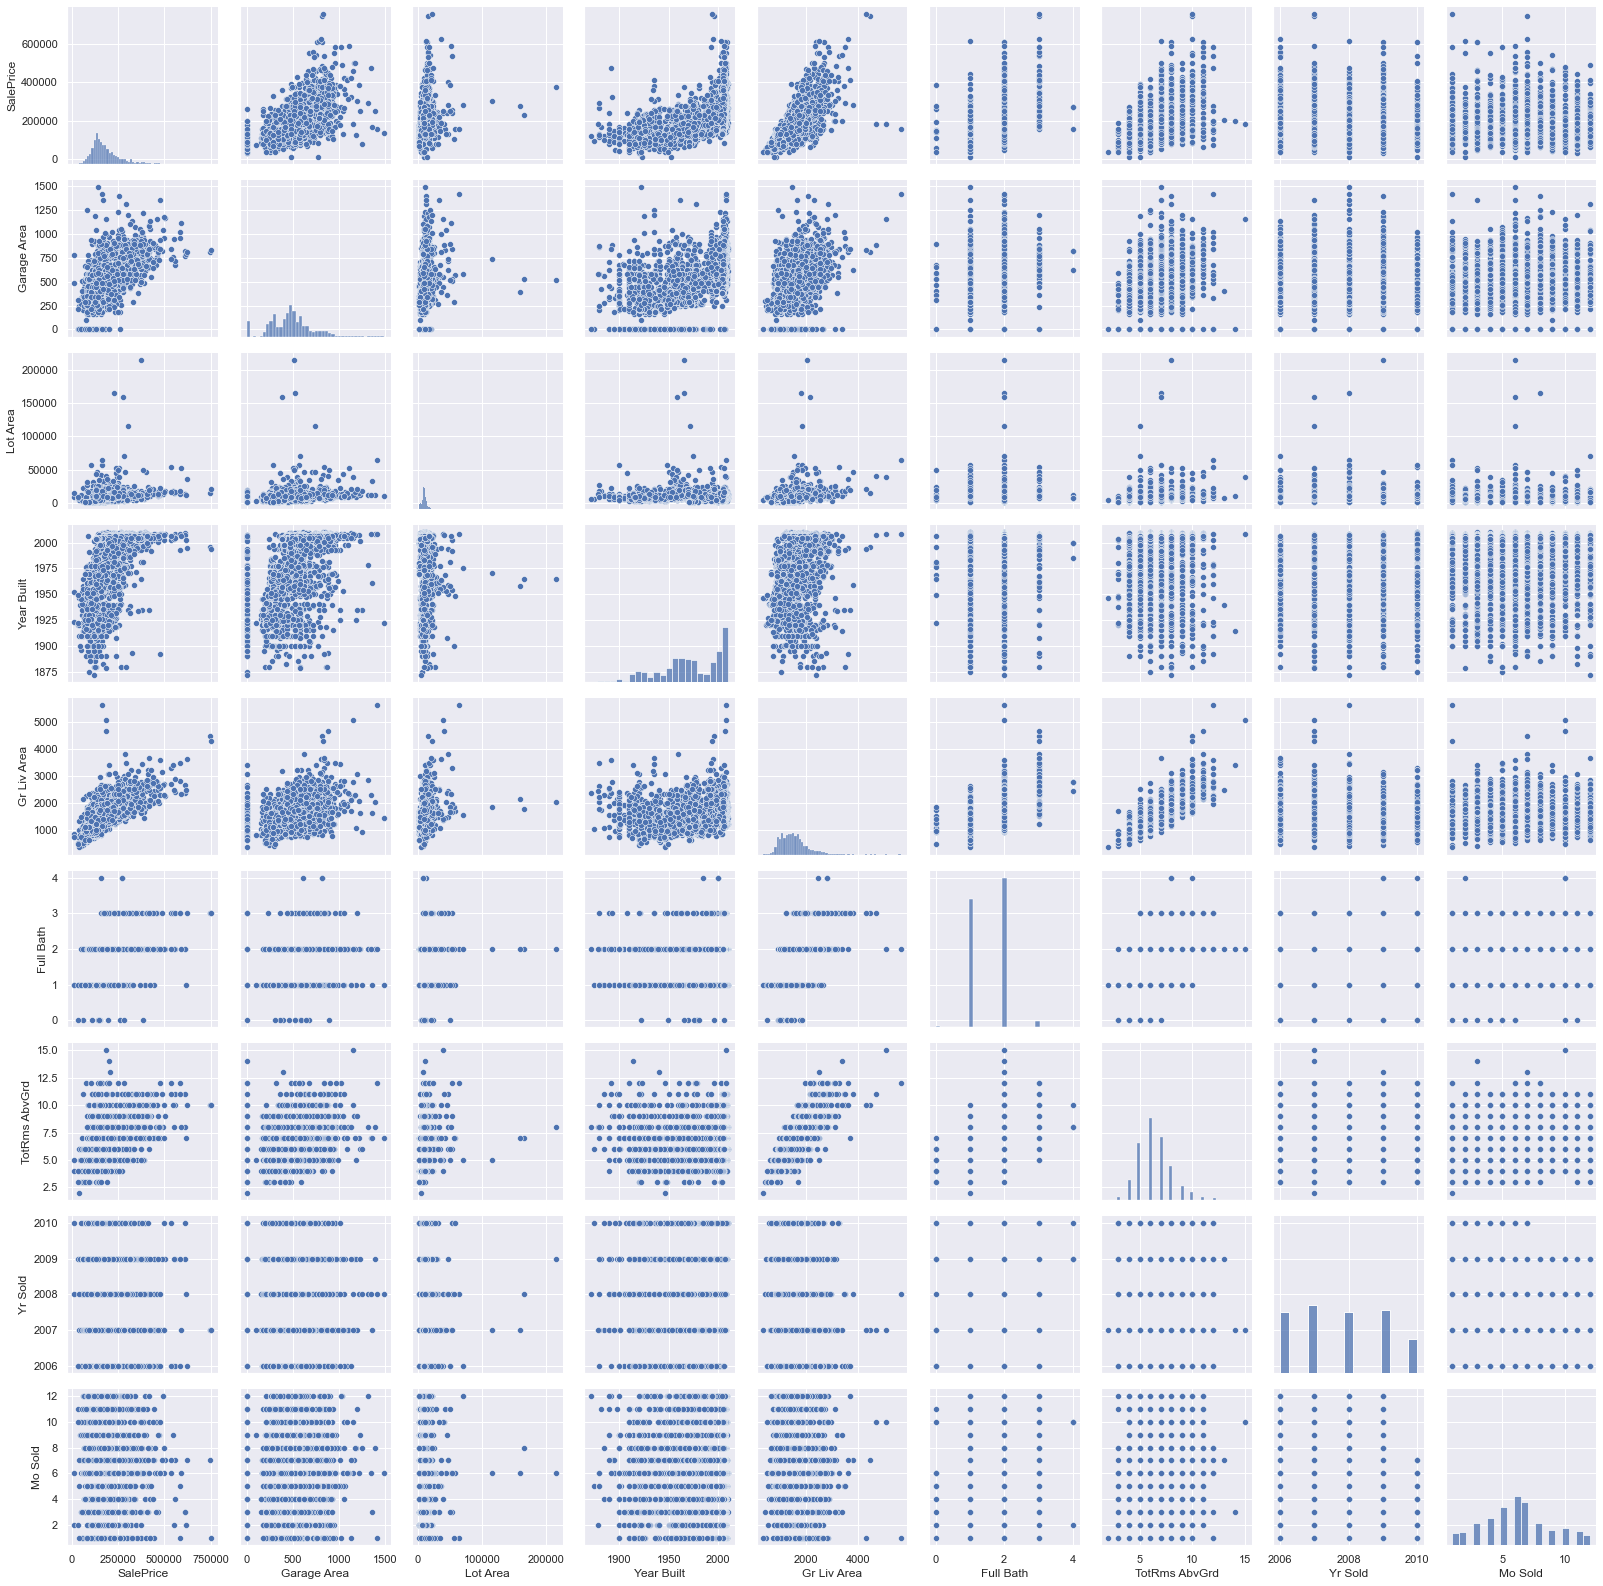

In [15]:
g = sns.PairGrid(df.select_dtypes('number'), vars=["SalePrice","Garage Area","Lot Area","Year Built",
                                                   "Gr Liv Area","Full Bath","TotRms AbvGrd","Yr Sold","Mo Sold"])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

#### Precio de venta y Año de construcción

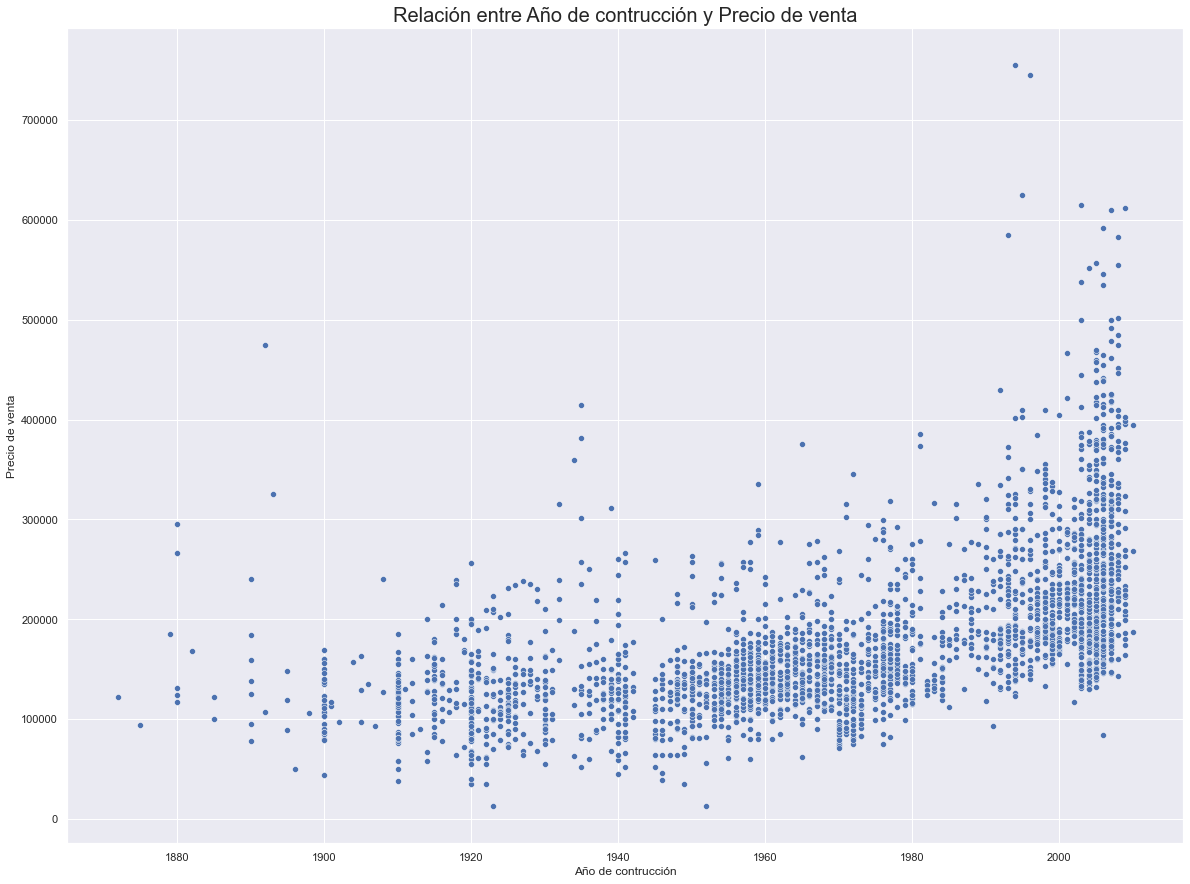

In [16]:
sns.scatterplot(x = df['Year Built'], y = df['SalePrice'], palette = 'cubehelix')
VariableX="Año de contrucción"
VariableY="Precio de venta"
plt.title(f'Relación entre {VariableX} y {VariableY}', fontsize = 20)
plt.xlabel(VariableX)
plt.ylabel(VariableY)
plt.show()

#### Precio de venta y Capacidad de autos

C:\Users\Nardulli\miniconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Figure size 648x288 with 0 Axes>

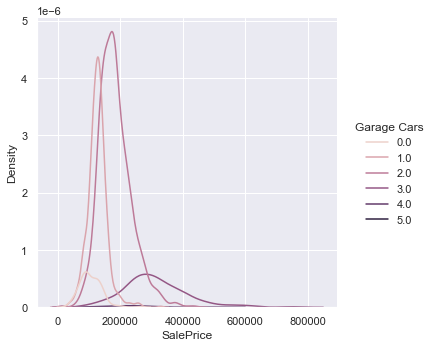

In [17]:
plt.figure(figsize=(9,4))
sns.displot(df, x="SalePrice", hue="Garage Cars", kind="kde")
plt.show()

#### Precio de venta y Calidad general

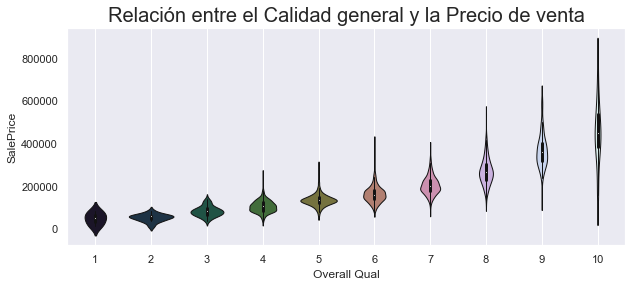

In [18]:
plt.figure(figsize=(10,4))
sns.violinplot(x=df['Overall Qual'], y=df['SalePrice'], palette = 'cubehelix', linewidth=1, fliersize=0.5)
VariableX="Calidad general"
VariableY="Precio de venta"
plt.title(f"Relación entre el {VariableX} y la {VariableY}", fontsize=20)
plt.grid()

#### Tipo de vivienda y Frente de lote

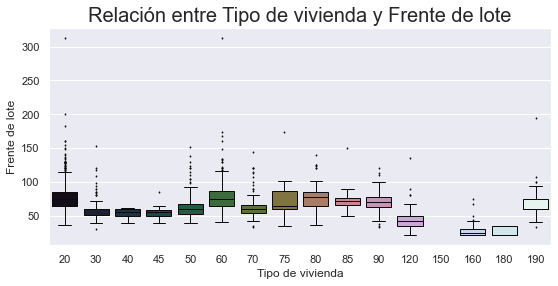

In [19]:
plt.figure(figsize=(9,4))
sns.boxplot(x = df['MS SubClass'], y= df['Lot Frontage'], palette = 'cubehelix', linewidth=1, fliersize=1)
VariableX="Tipo de vivienda"
VariableY="Frente de lote"
plt.title(f'Relación entre {VariableX} y {VariableY}', fontsize = 20)
plt.xlabel(VariableX)
plt.ylabel(VariableY)
plt.show()

#### Precio de venta y Baños completos en planta baja

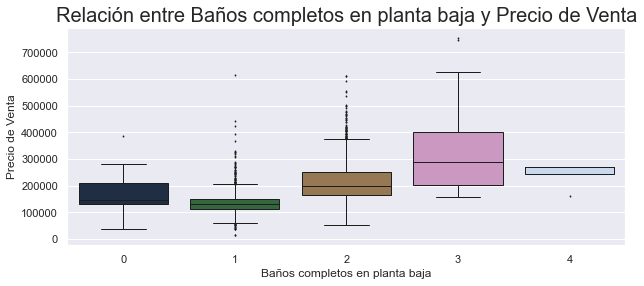

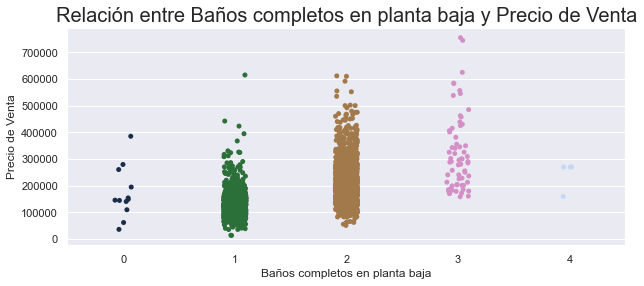

In [20]:
plt.figure(figsize=(10,4))
sns.boxplot(x = df['Full Bath'], y = df['SalePrice'], palette = 'cubehelix', linewidth=1, fliersize=1)
VariableX="Baños completos en planta baja"
VariableY="Precio de Venta"
plt.title(f'Relación entre {VariableX} y {VariableY}', fontsize = 20)
plt.xlabel(VariableX)
plt.ylabel(VariableY)
plt.show()

plt.figure(figsize=(10,4))
sns.stripplot(x = df['Full Bath'], y = df['SalePrice'], palette = 'cubehelix')
VariableX="Baños completos en planta baja"
VariableY="Precio de Venta"
plt.title(f'Relación entre {VariableX} y {VariableY}', fontsize = 20)
plt.xlabel(VariableX)
plt.ylabel(VariableY)
plt.show()

#### Capacidad de autos y Área de Garage

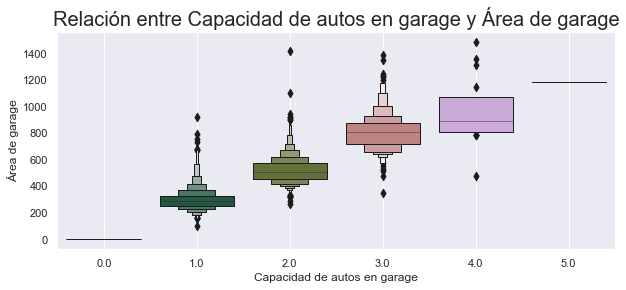

In [21]:
plt.figure(figsize=(10,4))
sns.boxenplot(x=df['Garage Cars'], y=df['Garage Area'], palette = 'cubehelix', linewidth=1)
VariableX="Capacidad de autos en garage"
VariableY="Área de garage"
plt.title(f"Relación entre {VariableX} y {VariableY}", fontsize=20)
plt.xlabel(VariableX)
plt.ylabel(VariableY)
plt.grid()

#### Total de habitaciones y Superficie habitable

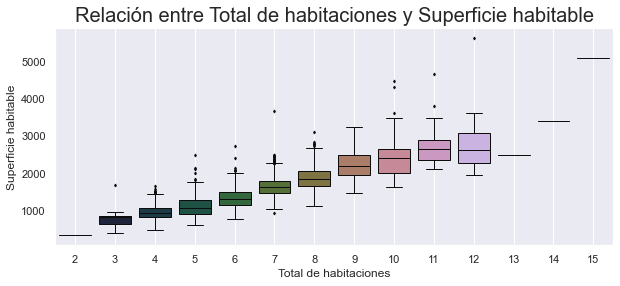

In [22]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['TotRms AbvGrd'], y=df['Gr Liv Area'], palette = 'cubehelix', linewidth=1, fliersize=2)
VariableX="Total de habitaciones"
VariableY="Superficie habitable"
plt.title(f"Relación entre {VariableX} y {VariableY}", fontsize=20)
plt.xlabel(VariableX)
plt.ylabel(VariableY)
plt.grid()

#### Precio de venta y Condición de venta

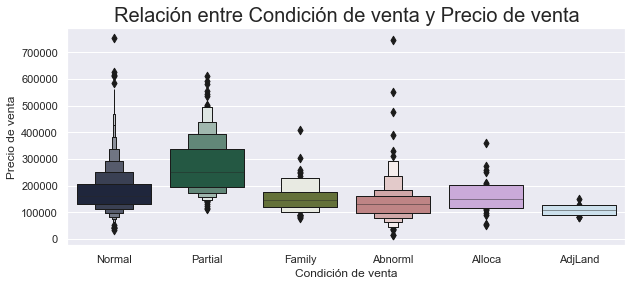

In [23]:
plt.figure(figsize=(10,4))
sns.boxenplot(x = df['Sale Condition'], y = df['SalePrice'], palette = 'cubehelix', linewidth=1, outlier_prop=1)
VariableX="Condición de venta"
VariableY="Precio de venta"
plt.title(f'Relación entre {VariableX} y {VariableY}', fontsize = 20)
plt.xlabel(VariableX)
plt.ylabel(VariableY)
plt.show()

#### Precio de venta y Barrio

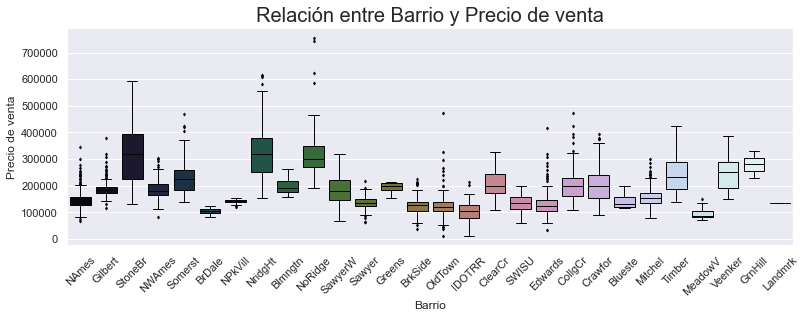

In [24]:
plt.figure(figsize=(13,4))
sns.boxplot(x = df['Neighborhood'], y = df['SalePrice'], palette = 'cubehelix', linewidth=1, fliersize=2)
VariableX="Barrio"
VariableY="Precio de venta"
plt.title(f'Relación entre {VariableX} y {VariableY}', fontsize = 20)
plt.xlabel(VariableX)
plt.ylabel(VariableY)
plt.xticks(rotation=45)
plt.show()

#### Precio de venta y Tipo de calle

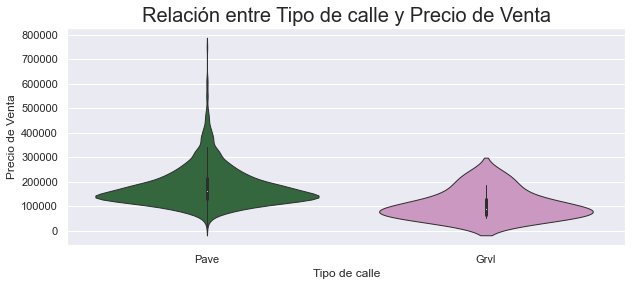

In [25]:
plt.figure(figsize=(10,4))
sns.violinplot(x = df['Street'], y = df['SalePrice'], palette = 'cubehelix', linewidth=1, fliersize=0.5)
VariableX="Tipo de calle"
VariableY="Precio de Venta"
plt.title(f'Relación entre {VariableX} y {VariableY}', fontsize = 20)
plt.xlabel(VariableX)
plt.ylabel(VariableY)
plt.show()

#### Precio de venta y Tipo de zona

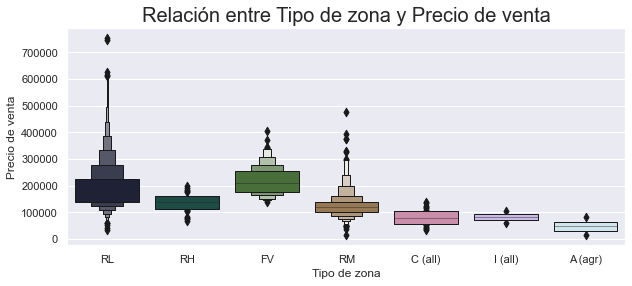

In [26]:
plt.figure(figsize=(10,4))
sns.boxenplot(x = df['MS Zoning'], y = df['SalePrice'], palette = 'cubehelix', linewidth=1)
VariableX="Tipo de zona"
VariableY="Precio de venta"
plt.title(f'Relación entre {VariableX} y {VariableY}', fontsize = 20)
plt.xlabel(VariableX)
plt.ylabel(VariableY)
plt.show()

#### Condición general y Año de construcción

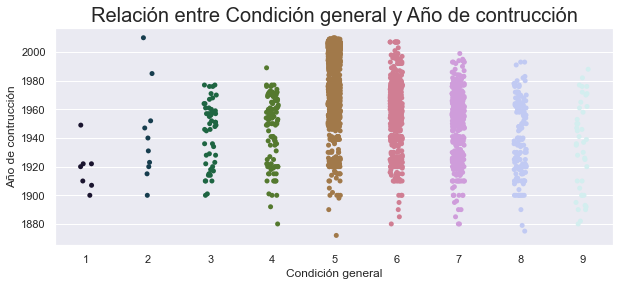

In [27]:
plt.figure(figsize=(10,4))
sns.stripplot(x = df['Overall Cond'], y = df['Year Built'], palette = 'cubehelix')
VariableX="Condición general"
VariableY="Año de contrucción"
plt.title(f'Relación entre {VariableX} y {VariableY}', fontsize = 20)
plt.xlabel(VariableX)
plt.ylabel(VariableY)
plt.show()

#### Calidad general y Estilo de casa

In [28]:
fig = px.parallel_categories(df, dimensions=[df['Overall Qual'].sort_values(ascending=False),df['House Style']],
                             labels={'dimensions_0':'Calidad general', 'House Style':'Estilo de casa'})

fig.show()

#### Condición general y Barrio

In [29]:
fig = px.parallel_categories(df, dimensions=[df['Overall Cond'].sort_values(ascending=False),
                                             df['Neighborhood']],
                             labels={'dimensions_0':'Condición general', 'dimensions_1':'Barrio'})

fig.show()

## Análisis Bivariado Conclusiones:
-se observan quye hay tendencias obvias que afectan principalmente el precio de venta, el tamaño del lote la cantidad de amenities (piscina garajes), aumentan el precio total solapando a otro tipo de data como la ubicacion y se precie mas el tamaño de areas cubiertas que de areas verdes y la amenitie mas valorada seria la piscina seguida por el garaje
-propiedades mas nuevas por regla general presentan un costo superior a propiedades antiguas con marcadas excepciones
-podria marcarse como una obviedad pero la calidad general impacta directamente sobre el precio del lote, a mayor calidad mayor precio

###### Tipos de viviendas:
- 20: 1 PISO - 1946 Y MÁS NUEVOS TODOS LOS ESTILOS

- 30: 1 PISO - 1945 Y MÁS ANTIGUOS

- 40: 1 PISO CON ÁTICO TERMINADO TODAS LAS EDADES

- 45: 1-1/2 HISTORIA - SIN TERMINAR TODAS LAS EDADES

- 50: 1-1/2 HISTORIA TERMINADA TODAS LAS EDADES

- 60: 2 PISOS 1946 Y MÁS NUEVOS

- 70: 2 PISOS 1945 Y MÁS ANTIGUOS

- 75: 2-1/2 HISTORIA TODAS LAS EDADES

- 80: DIVIDIDOS O MULTINIVEL

- 85: VESTÍBULO DIVIDIDO

- 90: DÚPLEX - TODOS LOS ESTILOS Y EDADES

- 120: PUD DE 1 PISO (Desarrollo de unidades planificadas) - 1946 Y MÁS RECIÉN

- 150: 1-1/2 STORY PUD - TODAS LAS EDADES

- 160: PUD DE 2 PISOS - 1946 Y MÁS NUEVOS

- 180: PUD - MULTINIVEL - INCLUYE NIVEL DIVIDIDO/VESTÍBULO

- 190: 2 CONVERSIÓN FAMILIAR - TODOS LOS ESTILOS Y EDADES

- Los tipos de casa 160 y 180 son las que tiene menor longitud en el frente de lote. Mientras que los tipos 20, 60, 75 y 80 tienen los frentes de lote más grandes.

- Las viviendas con 2 o más baños completos en planta baja conservan precios bastante más elevados que las que tienen 1 o ninguno. A su vez, la mayoría de los datos se encuentran en las casas que tiene uno o dos baños completos.
- Cuántos más autos entran en el garage de cada vivienda, mayor es la superficie que el mismo ocupa.
- Se observa una correlación positiva fuerte entre ambas variables. Cuántas más habitaciones tiene la casa, mayor es la superficie que las mismas ocupan.
##### Condiciones de venta:
Normal: Venta normal

Abnorml: Venta anormal. Comercio, ejecución hipotecaria, venta corta

AdjLand: Adquisición de terrenos adyacentes

Alloca: Asignación. Dos propiedades vinculadas con escrituras separadas, generalmente condominio con una unidad de garage

Family: Venta entre miembros de la familia

Partial: La vivienda no se completó cuando se evaluó por última vez (asociada con viviendas nuevas)

- Las ventas calificadas como parciales fueron pagadas por las casas con un precio mayor al resto. Mientras que las que se adquirieron como terrenos adyacentes, el precio pagado fue el menor.

##### Barrios: 
- Blmngtn: Bloomington Heights

- Blueste: Bluestem

- BrDale: Briardale

- BrkSide: Brookside

- ClearCr: Clear Creek

- CollgCr: College Creek

- Crawfor: Crawford

- Edwards: Edwards

- Gilbert: Gilbert

- IDOTRR: Iowa DOT and Rail Road

- MeadowV: Meadow Village

- Mitchel: Mitchell

- Names: North Ames

- NoRidge: Northridge

- NPkVill: Northpark Villa

- NridgHt: Northridge Heights

- NWAmes:	Northwest Ames

- OldTown: Old Town

- SWISU: South & West of Iowa State University

- Sawyer:	Sawyer

- SawyerW: Sawyer West

- Somerst: Somerset

- StoneBr: Stone Brook

- Timber:	Timberland

- Veenker: Veenker

- Las casas más caras su ubican mayormente en: Stone Brook, Northridge Heights y Northridge. Algunos de los barrios más accesibles para adquirir una casa son: Meadow Village, Iowa DOT and Rail Road y Briardale

##### Tipos de calle:
- Pave: Calle pavimentada

- Grvl: Camino de gravilla

- Las casas ubicadas en calles pavimentadas tienen en general un precio más elevado que las ubicadas sobre caminos de gravilla.

##### Tipo de Zona:
- A: Agricultura

- C: Comercial

- FV: Residencial de pueblo flotante

- I: Industrial

- RH: Residencial Alta Densidad

- RL: Residencial Baja Densidad

- RP: Parque Residencial de Baja Densidad

- RM: Residencial Media Densidad

- Las viviendas ubicadas en zona de Residencial de pueblo flotante son más caras que el resto de las otras zonas. Mientras que las casas en zonas agrícolas, industriales y comerciales son las más baratas. El resto del tipo de zonas residenciales se encuentran en el medio de ambos extremos.

-Las viviendas construidas a partir del año 1980 en adelante mayormente tienen una condición media respecto a la totalidad. Por otro lado, las viviendas construidas antes del 1970 tienen condiciones muy heterogéneas. Hay casas en muy buen estado y otras en condiciones muy malas.

-es una tendencia generalizada que la las casas con mejor calidad general son aquellas que tienen solo un piso o nivel mientras que en las casas con mas pisos la tendencia de calidad general suele ser descendente 

## Análisis Multivariado

#### Precio de ventas, Mes de venta, Área de garage, Área de lote, Año de construcción y Calidad general

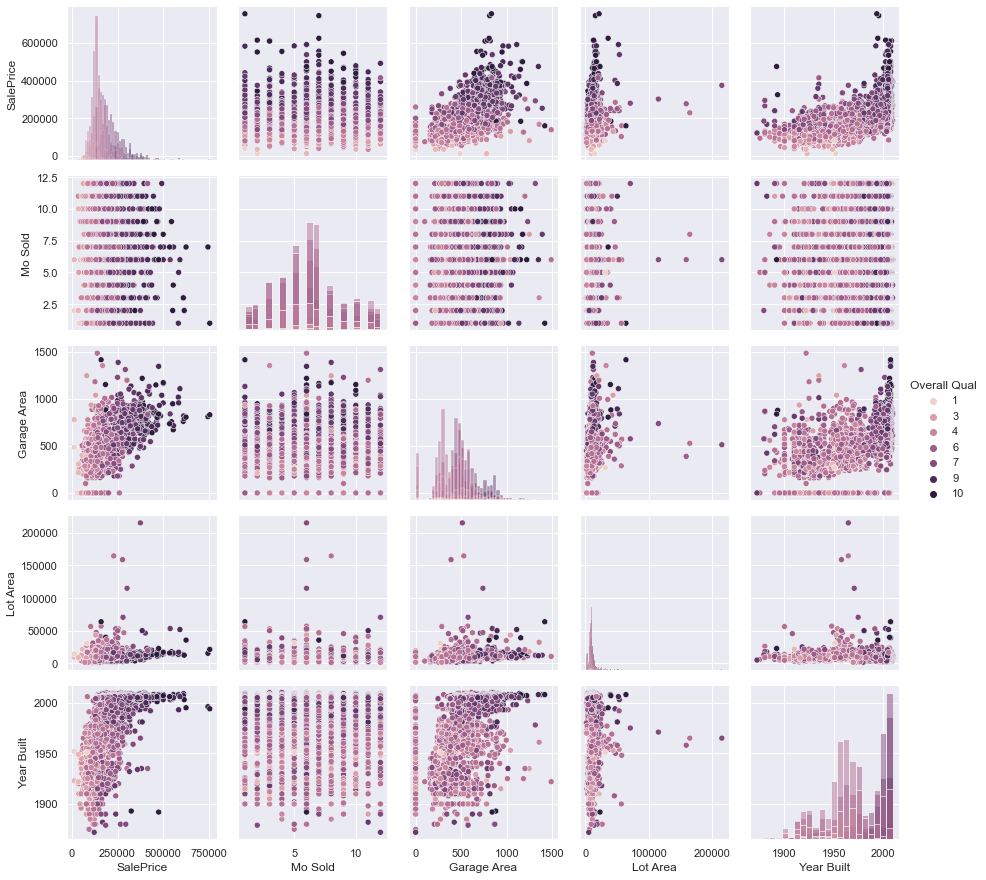

In [30]:
g = sns.PairGrid(df, vars=["SalePrice","Mo Sold","Garage Area","Lot Area","Year Built"],
                hue="Overall Qual")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

#### Precio de ventas, Mes de venta, Área de garage, Área de lote, Año de construcción y Habitaciones totales

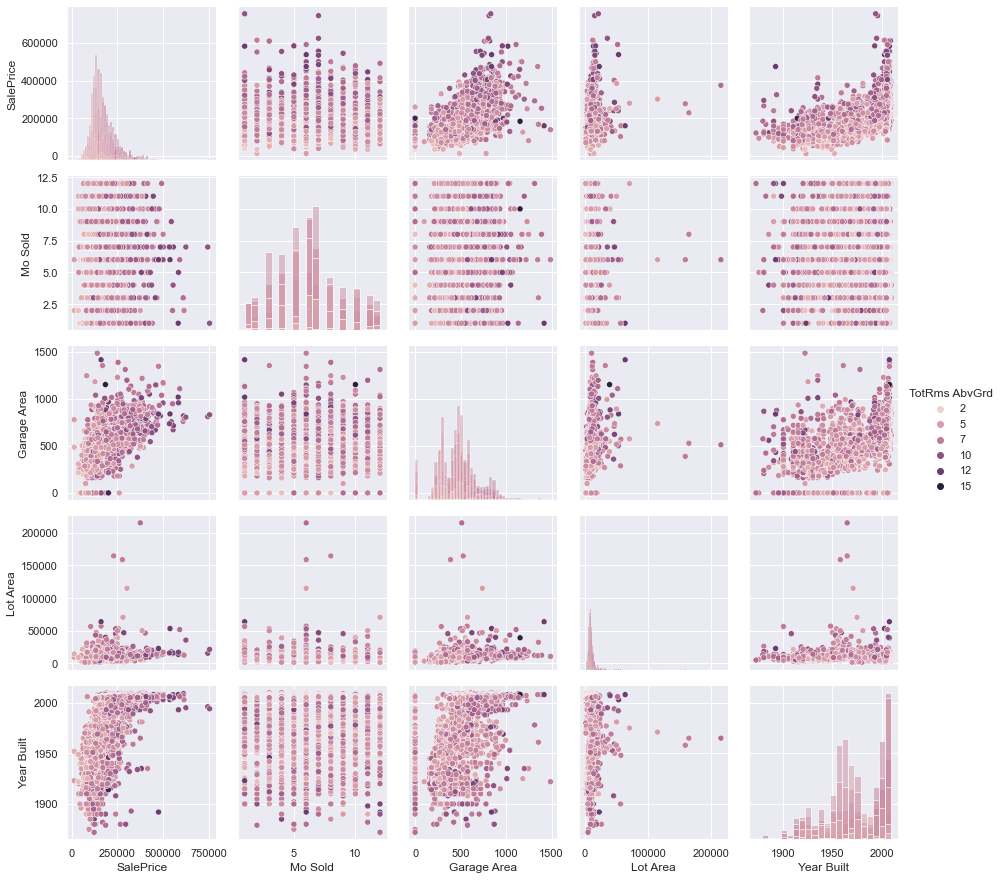

In [31]:
g = sns.PairGrid(df, vars=["SalePrice","Mo Sold","Garage Area","Lot Area","Year Built"],
                hue="TotRms AbvGrd")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

#### Precio de ventas, Año de construcción y Calidad general

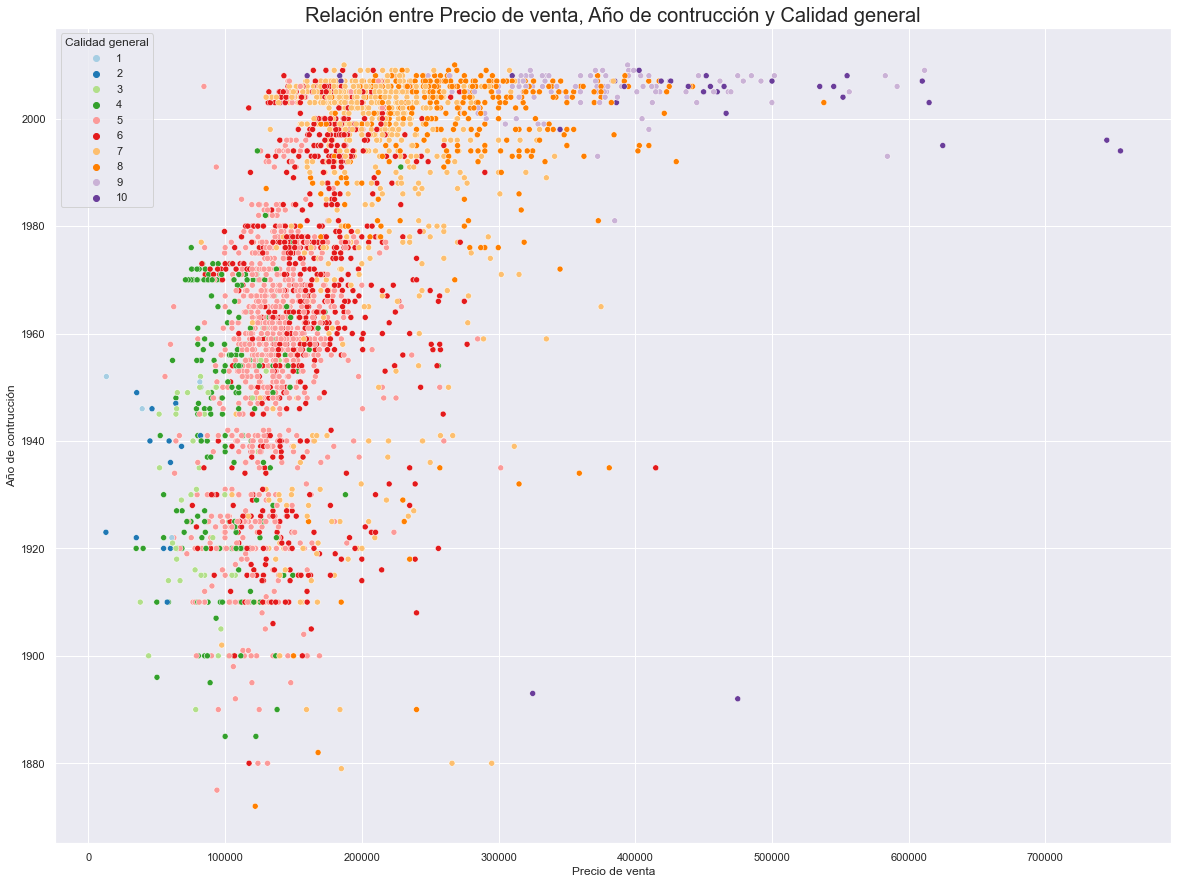

In [32]:
sns.scatterplot(x = df['SalePrice'], y = df['Year Built'], palette = 'Paired', hue=df['Overall Qual'])
VariableX="Precio de venta"
VariableY="Año de contrucción"
VariableCategorica="Calidad general"
plt.title(f'Relación entre {VariableX}, {VariableY} y {VariableCategorica}', fontsize = 20)
plt.xlabel(VariableX)
plt.ylabel(VariableY)
plt.legend(title=VariableCategorica)
plt.show()

#### Calidad general, Año de construcción y Tipo de zona

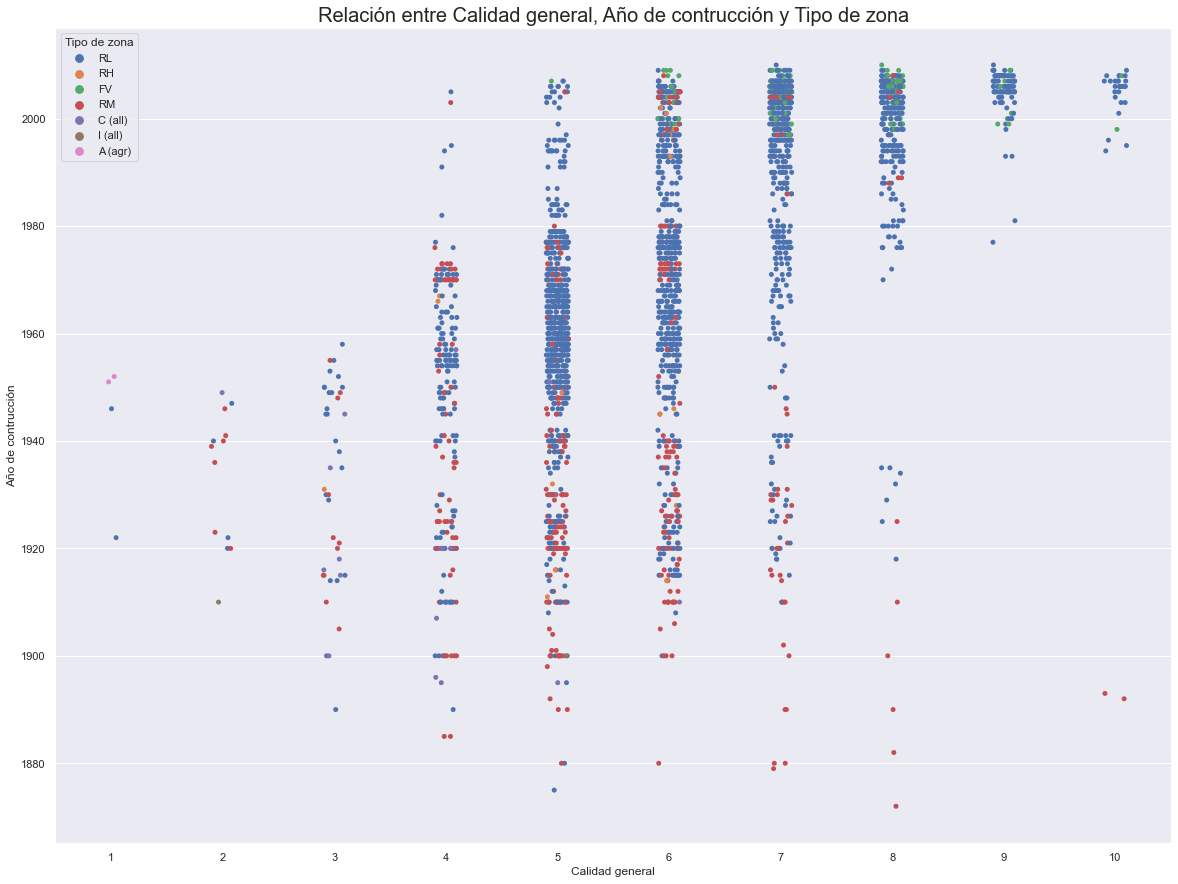

In [33]:
sns.stripplot(x = df['Overall Qual'], y = df['Year Built'], hue=df['MS Zoning'])
VariableX="Calidad general"
VariableY="Año de contrucción"
VariableCategorica="Tipo de zona"
plt.title(f'Relación entre {VariableX}, {VariableY} y {VariableCategorica}', fontsize = 20)
plt.xlabel(VariableX)
plt.ylabel(VariableY)
plt.legend(title=VariableCategorica)
plt.show()

#### Condición general, Estilo de vivienda y Capacidad de autos

In [34]:
fig = px.parallel_categories(df, dimensions=[df['Overall Cond'].sort_values(ascending=False),df['House Style']],
                             color=df['Garage Cars'],
                             labels={'dimensions_0':'Condición general', 'House Style':'Estilo de vivienda','Garage Cars':'Capacidad de autos en garage'})

fig.show()

## Análisis Multivariado Conclusiones
la tendencia observada en el analisis bivariado se mantiene:
-se observan quye hay tendencias obvias que afectan principalmente el precio de venta, el tamaño del lote la cantidad de amenities (piscina garajes), aumentan el precio total solapando a otro tipo de data como la ubicacion y se precie mas el tamaño de areas cubiertas que de areas verdes y la amenitie mas valorada seria la piscina seguida por el garaje
-propiedades mas nuevas por regla general presentan un costo superior a propiedades antiguas con marcadas excepciones
-podria marcarse como una obviedad pero la calidad general impacta directamente sobre el precio del lote, a mayor calidad mayor precio

#precio de venta año de construccion y calidad general
- Se pueden observar algunas tendencias de agrupamiento de datos en determinadas zonas. Hay una correlación positiva debil entre el precio de venta y el año de construcción. La calidad general está más relacionada con el precio de venta que con el año de construcción, porque se pueden observar más conformaciones de agrupamientos en forma de barras verticales que horizontales. Lo que significa que a medida que el precio crece la calidad va aumentando, mientras que por el lado del año de construcción se pueden ver calidades muy distintas para viviendas construidas durante la misma fecha.

#### Calidad general, Año de construcción y Tipo de zona
##### Tipo de Zona:
- A: Agricultura

- C: Comercial

- FV: Residencial de pueblo flotante

- I: Industrial

- RH: Residencial Alta Densidad

- RL: Residencial Baja Densidad

- RP: Parque Residencial de Baja Densidad

- RM: Residencial Media Densidad
- Hay una correlación muy leve positiva entre la calidad general de las viviendas con su año de construcción. Las viviendas construidas en los últimos años tienden a tener una mayor calidad que las más antiguas. En esta misma zona de la gráfica las viviendas pertenecen al tipo de zona Residencial Baja Densidad. Mientras que algunas pocas casas que son antiguas y son consideradas de muy buena calidad pertenecen a la zona Residencial Media Densidad.

#### Condición general, Estilo de vivienda y Capacidad de autos
##### Estilo de vivienda
	      
- 1Story: Un piso

- 1.5Fin: Un piso y medio, 2do nivel terminado

- 1.5Unf: Un piso y medio, 2do nivel sin terminar

- 2Story: dos pisos

- 2.5 Fin: Dos pisos y medio, 2do nivel terminado

- 2.5Unf: Dos pisos y medio, 2do nivel sin terminar

- Foyer: Hall dividido

- SLvl: Construido sobre dos niveles

- La mayor condición general asignada a las viviendas fue de 5. La mayoria de los datos con esta condición tiene capacidad en el garage para dos autos, y en menor medida en otros casos, para uno y para tres. Los que tienen capacidad para dos autos son mayormente casas de uno o de dos pisos. Mientras que los que tienen capacidad sólo para un vehículo tienen generalmente un solo piso de vivienda.